# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> MCD3020 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2022-2**<br>
**Profesora:** Paula Aguirre <br>

# Tarea 4: Algoritmos de regresión.
.

***
## Instrucciones Generales:
- Esta Tarea debe ser desarrollada completamente en lenguaje de programación Python, y estructurarse en formato de Jupyter Notebook.
- El Notebook debe estrar estructurado en forma ordenado, seguir buenas prácticas de escritura y programación, e incluir comentarios o celdas de markdown suficientes para explicar claramente todos lo códigos computacionales,

***
## Introducción.


Continuando con el caso de estudio desarrollado en las Tareas anteriores del curso, suponga que ud.está a cargo del desarrollo de un estudio del mercado laboral de científicos de datos en latinoamérica, para lo cual necesita construir, procesar y analizar una base de datos con las ofertas de trabajo publicadas en distintos países de la región.

En la **Tarea 1**, ud. avanzó en la primera etapa de construcción de la base de datos, utilizando web scraping para extraer los datos de ofertas de empleo en *data science* publicados en la red Linkedin, para una ciudad o país. Este proceso fue repetido y ampliado para todos los países de sudamérica, para construir una base de datos más amplia para su estudio.  

En la **Tarea 2**, se realizó el proceso de integración, limpieza y procesamiento de las bases de datos obtenidas mediante webscraping, generando así un conjunto de datos apto para distintos tipos de análisis.

En la **Tarea 3**, se desarrolló el análisis exploratorio  sobre una base de datos más extensa, incluyendo información de salarios ofrecidos para cada puesto de trabajo, años de experiencia y nivel de educación exigidos, y un score de ambiente laboral de cada empresa ofertante. Esta es la base de datos final a utilizar para el análisis y modelamiento de datos.

En esta **Tarea 4 y final**, ud. entrenará y validará un modelo predictivo de salarios de puestos de trabajos en Ciencia de Datos en Sudamérica.

## Datos de Entrada.

La base de datos final de ofertas de empleo para Cientistas de Datos en Sudamérica están disponibles en el siguiente link:

https://raw.githubusercontent.com/paguirre-uc/mds3020_2022/main/tarea4/datosT4.csv

Esta base de datos contiene las siguientes variables:

* `Country`: país del anuncio.
* `Location`: ubicación del empleo.
* `Title`: título del cargo ofrecido.
* `Company`: nombre de la compañía.
* `Url`: URL del anuncio.
* `CountryScore`: *Índice global de innovación* del país del anuncio.
* `English`: requisito de inglés para el empleo. 1: requiere idioma inglés, 0: no requiere idioma inglés.
* `EducationLevel`: años de formación profesional requeridos para el cargo. 0: no requiere formación profesional, 1: formación técnica básica, 2: dos años de formación técnica, 3: dos años de formación técnica,     4: bachiller, 5: título profesional, 6: postgrado.
* `YearsExperience`: años de experiencia laboral requeridos.
* `CompanyScore`: calificación de ambiente laboral de la compañía.

**Nota**: estos datos han sido parcialmente simulados, no los utilice para ninguna toma de decisión real.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('https://raw.githubusercontent.com/paguirre-uc/mds3020_2022/main/tarea4/datosT4.csv')


### Para recordar el análisis exploratorio de datos, considere los siguientes gráficos:

<Figure size 1000x500 with 0 Axes>

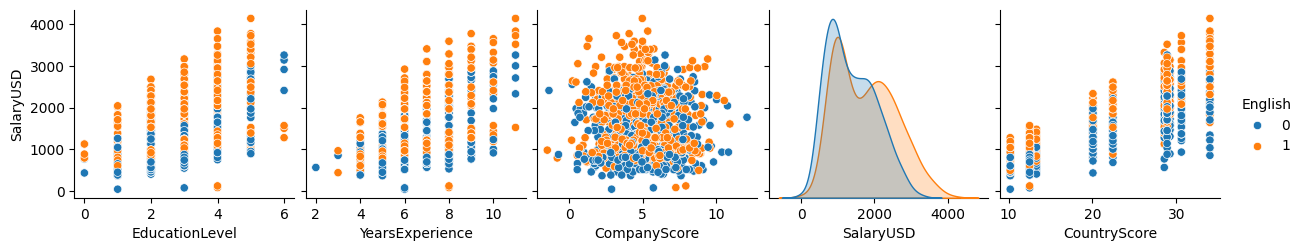

In [4]:
fig=plt.figure(figsize=(10,5));
sns.pairplot(data=df,y_vars='SalaryUSD',hue='English');

### 1. Entrenamiento y validación de modelos de regresión lineal. [6 puntos]

Considere las siguientes variables del dataset:[`English`,`EducationLevel`, `YearsExperience`,`CompanyScore`,`CountryScore`].

**a)** Utilizando la librería `sklearn`, entrene al menos 3 modelos de regresión lineal para predecir la variable `SalaryUSD`, utilizando *distintas combinaciones* de variables predictoras.<br>

Para el entrenamiento de modelos de regresión,
* Defina la matriz de variables predictoras ($X$) y el vector objetivo ($y$).
* Separe los datos en conjuntos de entrenamiento y prueba, con una proporción 70%-30%.<br>
* Recuerde estandarizar las variables predictoras.<br>


**b**) Para cada uno de los modelos entrenados, calcule las métricas de desempeño ($R^2$,RMSE) para los datasets de entrenamiento y de prueba, compare y argumente: ¿cuál combinación de variables permite obtener el mejor modelo predictivo para `SalaryUSD`?

* Note que `RMSE=np.sqrt(mean_squared_error)`


**c)** Utilice el *mejor* modelo entrenado en la parte **b)**, para realizar predicciones para nuevos datos: estime el salario en USD esperado para un puesto de trabajo con las siguientes características:

`English`=1,`EducationLevel`=6,`YearsExperience`=2,`CompanyScore`=7.5,`CountryScore`=34.0 (es decir, un cientista de datos con postgrado, 2 años de experiencia laboral, en una compñía con ranking 7.5, en Chile).

* Nota: recuerde que estos datos han sido parcialmente simulados, por lo que no reflejan necesariamente la realidad del mecardo laboral.

### 2. Entrenamiento y validación de modelos de regresión kNN. [6 puntos]

**a)** Utilizando la combinación idónea de variables identificada en el punto 1.b, entrene un modelo de regresión kNN con  *k=3*.<br>
**b)** Calcule las métricas de desempeño del modelo kNN ($R^2$,RMSE) para los datasets de entrenamiento y de prueba.<br>
**c)** Analice brevemente: ¿los resultados indican un posible sobreajuste (overfitting) o sub-ajuste (underfitting)? <br>
**d)** De acuerdo a su respuesta en el punto c), ¿considera que la elección *k=3* es adecuada, o sugiere un valor mayor o menor para este parámetro? Argumente brevemente su respuesta.<br>
**e)** Compare el error cuadrático medio obtenido para el modelo de regresión kNN (con *k=3*, u otro valor si prefiere), y para el mejor modelo lineal obtenido en el punto 1. Comente, ¿cuál modelo tiene el mejor desempeño, y por que? <br>

# Respuestas Pregunta 1:

La combinación de variables que da como resultado en un mejor modelos para predecir SalaryUSD es EducationLevel y CountryScore pues en las pruebas que hice fue el que mayor R2. Con este modelo estamos logrando explicar el 86% de la varianza de SalaryUSD. Adicionalmente, el modelo está generalizando bien pues el r2 tanto de test y de train son similares (con 85% y 86% respectivamente), es decir, no hay overfitting.

De igual manera, el modelo con esas dos variables (EducationLevel y CountryScore) es el que menos error cuadrático medio tiene de los 3 modelos propuestos, teniendo el modelo ganador un RMSE de 92270.52 en los datos de prueba mientras que los RMSEs de los demás modelos superan el valor de 400,000 

## Literales a) y b)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error, mean_squared_error

X1 = df[['English','EducationLevel', 'YearsExperience']]
X2 = df[['EducationLevel','CountryScore']]
X3 = df[['English','EducationLevel']]

y = df['SalaryUSD']

dataframe_modelos = pd.DataFrame()

for i,X in enumerate([X1, X2, X3]):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # calculamos el StandardScaler en train y transformamos en train y test

    sc = StandardScaler()
    sc.fit(X_train)

    X_train = pd.DataFrame(sc.transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)


    # entrenamos la regresion

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    rmse_train = mean_squared_error(y_train, y_pred_train)
    rmse_test = mean_squared_error(y_test, y_pred_test)

    modelo_tmp = pd.DataFrame({
        'nombre_modelo': ['modelo' + str(i)],
        'variables': [', '.join(X_train.columns)],
        'r2_train':[r2_train],
        'r2_test':[r2_test],
        'rmse_train':[rmse_train],
        'rmse_test':[rmse_test],
        'modelo':[lr],
        'scaler':[sc]

    }).round(2)

    dataframe_modelos = pd.concat([dataframe_modelos, modelo_tmp], axis=0)

dataframe_modelos

,nombre_modelo,variables,r2_train,r2_test,rmse_train,rmse_test,modelo,scaler
0,modelo0,"English, EducationLevel, YearsExperience",0.27,0.30,406961.02,424032.78,LinearRegression(),StandardScaler()
0,modelo1,"EducationLevel, CountryScore",0.86,0.85,77397.10,92270.52,LinearRegression(),StandardScaler()
0,modelo2,"English, EducationLevel",0.26,0.25,413911.73,455753.95,LinearRegression(),StandardScaler()


## Literal c)

In [45]:
modelo = dataframe_modelos.loc[dataframe_modelos['r2_test']==np.max(dataframe_modelos['r2_test'])]['modelo'][0]
scaler = dataframe_modelos.loc[dataframe_modelos['r2_test']==np.max(dataframe_modelos['r2_test'])]['scaler'][0]

English=1
EducationLevel=6
YearsExperience=2
CompanyScore=7.5
CountryScore=34.0

datos_nuevos = pd.DataFrame({'EducationLevel':[EducationLevel], 'CountryScore': [CountryScore]})
datos_nuevos = pd.DataFrame(scaler.transform(datos_nuevos), columns=datos_nuevos.columns)

print(modelo.predict(datos_nuevos))

[3422.34756704]


# Respuesta Pregunta 2
## Literales c), d), e)

**Ver literales a) y b) abajo**

c) Viendo los resultados obtenidos entrenando un modelo de KNN con 3 neighbors, diría que se trata de un bueno modelo que no está presentando overfitting ni underfitting solo viendo el R2. Sí hay espacio de mejora en el caso del RMSE pues es mucho mayor en test que en train.

d) Si aumentamos el valor de K, podemos ver que podemos aumentar el R2 de manera segura (es decir, aumenta tanto en train como en test) y disminuimos el error RMSE. Valores de hasta K=11 (aproximadamente) puede ser apropiados para mejorar problemas de overfitting pues a partir de ese valor, el RMSE empieza a subir de manera sistemática y se comienza a aprecir overfitting (ver gráfico1 y gráfico2 respectivamente).

e) Si comparamos el KNN con k=3 contra el mejor modelo linear de la pregunta 1, podemos apreciar que el mejor es el KNN pues presenta mejores valores de R2 y de RMSE para los datos de validación (test). Mientras que la regresión lineal tiene un R2 de 85%, el KNN tiene un R2 de 86%; el RMSE para la regresión lineal es de 92270.52 mientras que para el KNN es de 82999.21. Entonces, el KNN se desempeña mejor en el set de prueba (test set). Por estas razones el KNN con k=3 tiene mejor desempeño

In [48]:
from sklearn.neighbors import KNeighborsRegressor

X = df[['EducationLevel','CountryScore']]
y = df['SalaryUSD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sc = StandardScaler()
sc.fit(X_train)

X_train = pd.DataFrame(sc.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

dataframe_knn = pd.DataFrame()

for k in range(1,101):

    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    rmse_train = mean_squared_error(y_train, y_pred_train)
    rmse_test = mean_squared_error(y_test, y_pred_test)

    modelo_tmp = pd.DataFrame({
        'k': [k],
        'r2_train':[r2_train],
        'r2_test':[r2_test],
        'rmse_train':[rmse_train],
        'rmse_test':[rmse_test]
    }).round(2)

    dataframe_knn = pd.concat([dataframe_knn, modelo_tmp], axis=0)

## Literal a), b)

In [50]:
dataframe_knn[dataframe_knn['k']==3]

,k,r2_train,r2_test,rmse_train,rmse_test
0,3,0.87,0.86,70306.27,82999.21


In [55]:
dataframe_knn.head(30)

,k,r2_train,r2_test,rmse_train,rmse_test
0,1,0.76,0.79,131528.53,126499.79
0,2,0.86,0.86,78153.08,85255.51
0,3,0.87,0.86,70306.27,82999.21
0,4,0.88,0.87,64852.34,80792.22
0,5,0.89,0.87,61841.03,79656.43
0,6,0.89,0.87,62202.81,79656.59
0,7,0.89,0.87,61150.78,79736.90
0,8,0.89,0.87,59395.08,79680.33
0,9,0.89,0.87,59733.82,78337.63
0,10,0.89,0.87,59621.50,78434.80


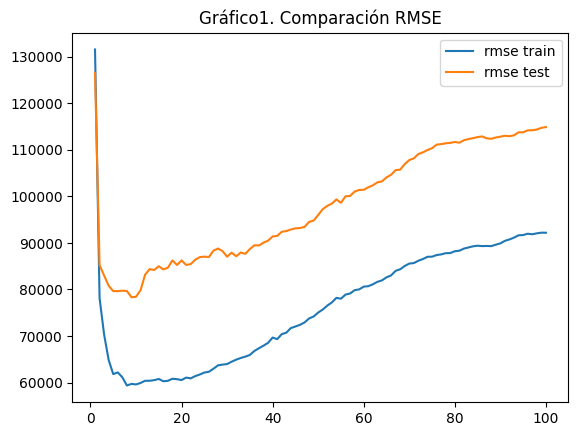

In [57]:
import matplotlib.pyplot as plt

x_plot = dataframe_knn['k']
y_rmse_train = dataframe_knn['rmse_train']
y_rmse_test = dataframe_knn['rmse_test']

plt.plot(x_plot, y_rmse_train, label='rmse train')
plt.plot(x_plot, y_rmse_test, label='rmse test')
plt.title('Gráfico1. Comparación RMSE')
plt.legend()
plt.show()

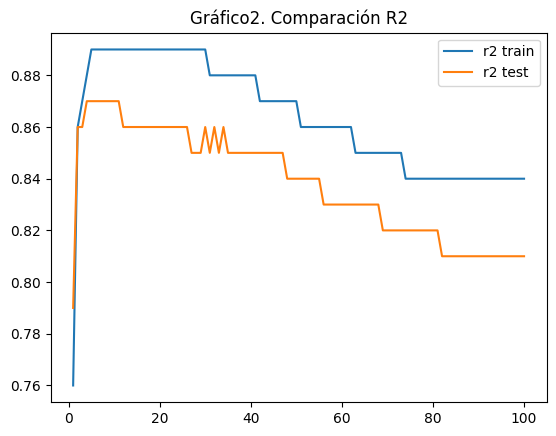

In [58]:
import matplotlib.pyplot as plt

x_plot = dataframe_knn['k']
y_rmse_train = dataframe_knn['r2_train']
y_rmse_test = dataframe_knn['r2_test']

plt.plot(x_plot, y_rmse_train, label='r2 train')
plt.plot(x_plot, y_rmse_test, label='r2 test')
plt.title('Gráfico2. Comparación R2')
plt.legend()
plt.show()